<a href="https://colab.research.google.com/github/mayaarvanitis/cardiacBoolNet/blob/main/cardiacBoolNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BIOL 309 Project
# Maya Arvanitis

## Simulating Cardiac Genes and their Interactions with a basic Boolean Network

## 1. Implementing a basic network

Cardiac Boolean Gene Network Simulation

This simulation models a Boolean gene regulatory network for cardiac development, inspired by the approaches in Grieb et al. (2015) and Borriello & Daniels (2021). Boolean networks are simplified models of gene interactions, where each gene is represented as being either "on" (1) or "off" (0). This model uses Boolean rules to represent gene interactions that contribute to the development of heart tissue and function.

### Background
1. **Grieb et al. (2015)**: This study extended Boolean networks to model the variability in gene expression by incorporating uncertainty. Focusing on cardiac development, the authors modeled the gene regulatory network controlling cardiac progenitor cell differentiation. Using Boolean logic, the study explored how cardiac progenitor cells in the first and second heart fields differentiate into various heart structures. By using Boolean states to represent gene expression, Boolean networks allowed the study to predict stable states (attractors) that correspond to specific biological phenotypes.

2. **Borriello & Daniels (2021)**: This paper examined how biological Boolean networks could be controlled by targeting minimal sets of genes, known as control kernels. The findings showed that the control of a biological system might often be achieved with a surprisingly small number of genes, scaling logarithmically with the number of attractors in the network. These insights are relevant for understanding how to influence or reset cardiac networks during diseases by targeting key genes.

### Objective
This simulation is inspired by the goal of exploring cardiac diseases within a Boolean network framework. Specifically, we introduce a "disease state" by modifying the Boolean rules and initial conditions of certain cardiac genes to simulate:
   - Overexpression of *Nkx2.5*, a transcription factor critical in heart development.
   - Loss of function in *Tbx5*, another important cardiac transcription factor.

These modifications aim to mimic pathological conditions such as congenital heart defects or heart disease, where gene expression changes disrupt normal heart development. By comparing the network dynamics in healthy versus diseased conditions, we can observe the impact of genetic perturbations on cardiac gene interactions.

### Code Outline
1. **Gene Definitions and Initial States**: Defines key cardiac genes (*Isl1*, *Nkx2.5*, and *Tbx5*) and their initial states for healthy and diseased conditions.
2. **Boolean Update Functions**: Implements Boolean rules for each gene, reflecting how its state is influenced by other genes in the network under both healthy and diseased conditions.
3. **Simulation Function**: Runs the network for a specified number of steps, recording each gene's state to observe attractors (stable states).
4. **Visualization**: Plots the state of each gene over time to highlight differences between healthy and diseased network dynamics.

### Expected Outcome
By simulating this network, we expect to see different attractors and dynamic behaviors in the diseased network compared to the healthy one, illustrating how overexpression and loss-of-function mutations alter gene regulatory interactions in cardiac tissue.

References:
1. Grieb M, et al. (2015) "Predicting Variabilities in Cardiac Gene Expression with a Boolean Network Incorporating Uncertainty." PLoS ONE 10(7): e0131832.
2. Borriello E, Daniels BC. (2021) "The basis of easy controllability in Boolean networks." Nature Communications 12:5227.

Note:

- Each gene will have state of 0 or 1
- The state of each gene at the next time step depends on the states of other genes according to defined rules.

In [10]:
#Imports

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the initial states of genes (0 = off, 1 = on)
# Let's assume we have three genes: Isl1, Nkx2.5, and Tbx5
genes = ["Isl1", "Nkx2.5", "Tbx5"]
initial_state = {"Isl1": 1, "Nkx2.5": 0, "Tbx5": 1}

In [4]:
# Define the Boolean rules for the network
# Each rule defines the next state of a gene based on the current states
def update_Isl1(current_state):
    # Example rule: Isl1 depends on itself and Nkx2.5
    return current_state["Isl1"] and not current_state["Nkx2.5"]

def update_Nkx2_5(current_state):
    # Example rule: Nkx2.5 depends on Isl1 and Tbx5
    return current_state["Isl1"] or not current_state["Tbx5"]

def update_Tbx5(current_state):
    # Example rule: Tbx5 depends only on Nkx2.5
    return not current_state["Nkx2.5"]

In [5]:
# Define a function to update the state of the network
def update_network(current_state):
    next_state = {
        "Isl1": update_Isl1(current_state),
        "Nkx2.5": update_Nkx2_5(current_state),
        "Tbx5": update_Tbx5(current_state)
    }
    return next_state

In [6]:
# Simulate the network for a specified number of steps
def simulate_network(initial_state, steps=10):
    state_history = [initial_state]
    current_state = initial_state

    for step in range(steps):
        next_state = update_network(current_state)
        state_history.append(next_state)

        # Print the current state for observation
        print(f"Step {step + 1}: {next_state}")

        # Check if the network has reached a stable state (attractor)
        if next_state == current_state:
            print("Attractor reached!")
            break
        current_state = next_state

    return state_history

In [7]:
# Run the simulation
simulate_network(initial_state, steps=10)

Step 1: {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True}
Step 2: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Step 3: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Attractor reached!


[{'Isl1': 1, 'Nkx2.5': 0, 'Tbx5': 1},
 {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True},
 {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False},
 {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}]

## 2. Simulating Cardiac Disease

We will not introduce a "disease state" by forcing certain genes to behave differently than in a "healthy" network.

As a test, Assume the following:
- the disease causes *Nkx2.5* to be overexpressed so it is always "on"
- The disease causes a loss-of-function mutation in *Tbx5* so it is always "off"

In [8]:
import numpy as np

# Define genes and initial states
genes = ["Isl1", "Nkx2.5", "Tbx5"]
initial_state_healthy = {"Isl1": 1, "Nkx2.5": 0, "Tbx5": 1}
initial_state_disease = {"Isl1": 1, "Nkx2.5": 1, "Tbx5": 0}  # Diseased conditions

# Define the Boolean rules for the healthy network
def update_Isl1_healthy(current_state):
    return current_state["Isl1"] and not current_state["Nkx2.5"]

def update_Nkx2_5_healthy(current_state):
    return current_state["Isl1"] or not current_state["Tbx5"]

def update_Tbx5_healthy(current_state):
    return not current_state["Nkx2.5"]

# Define the Boolean rules for the diseased network
def update_Isl1_disease(current_state):
    return current_state["Isl1"] and not current_state["Nkx2.5"]

def update_Nkx2_5_disease(current_state):
    return 1  # Overexpression: Nkx2.5 is always on in the disease state

def update_Tbx5_disease(current_state):
    return 0  # Loss of function: Tbx5 is always off in the disease state

# Update function for healthy and diseased networks
def update_network(current_state, disease=False):
    if disease:
        next_state = {
            "Isl1": update_Isl1_disease(current_state),
            "Nkx2.5": update_Nkx2_5_disease(current_state),
            "Tbx5": update_Tbx5_disease(current_state)
        }
    else:
        next_state = {
            "Isl1": update_Isl1_healthy(current_state),
            "Nkx2.5": update_Nkx2_5_healthy(current_state),
            "Tbx5": update_Tbx5_healthy(current_state)
        }
    return next_state

# Simulation function
def simulate_network(initial_state, steps=10, disease=False):
    state_history = [initial_state]
    current_state = initial_state

    print("\nStarting simulation with", "disease state:" if disease else "healthy state:")
    for step in range(steps):
        next_state = update_network(current_state, disease=disease)
        state_history.append(next_state)

        # Print current state
        print(f"Step {step + 1}: {next_state}")

        # Check for attractor (stable state)
        if next_state == current_state:
            print("Attractor reached!")
            break
        current_state = next_state

    return state_history

# Run simulation for healthy network
print("Simulating Healthy Network")
simulate_network(initial_state_healthy, steps=10, disease=False)

# Run simulation for diseased network
print("\nSimulating Diseased Network")
simulate_network(initial_state_disease, steps=10, disease=True)


Simulating Healthy Network

Starting simulation with healthy state:
Step 1: {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True}
Step 2: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Step 3: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Attractor reached!

Simulating Diseased Network

Starting simulation with disease state:
Step 1: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Step 2: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Attractor reached!


[{'Isl1': 1, 'Nkx2.5': 1, 'Tbx5': 0},
 {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0},
 {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}]


Starting simulation with healthy state:
Step 1: {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True}
Step 2: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Step 3: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Attractor reached!


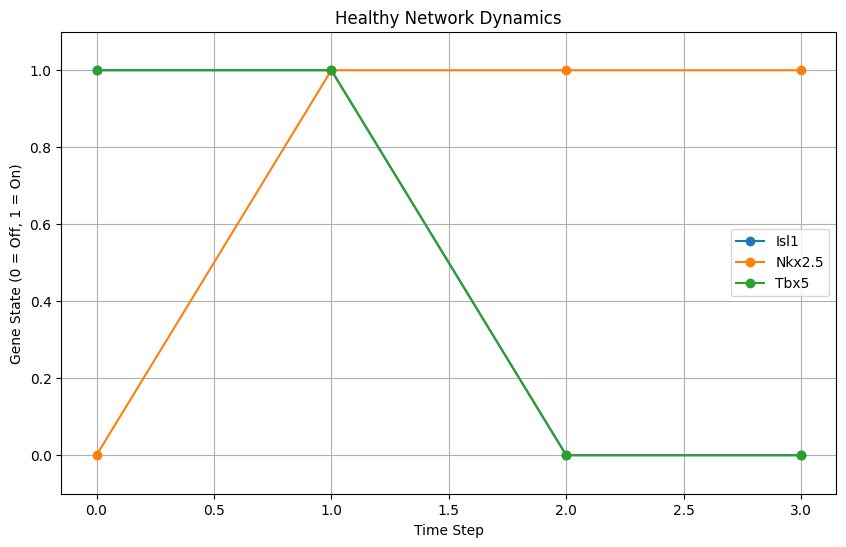


Starting simulation with disease state:
Step 1: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Step 2: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Attractor reached!


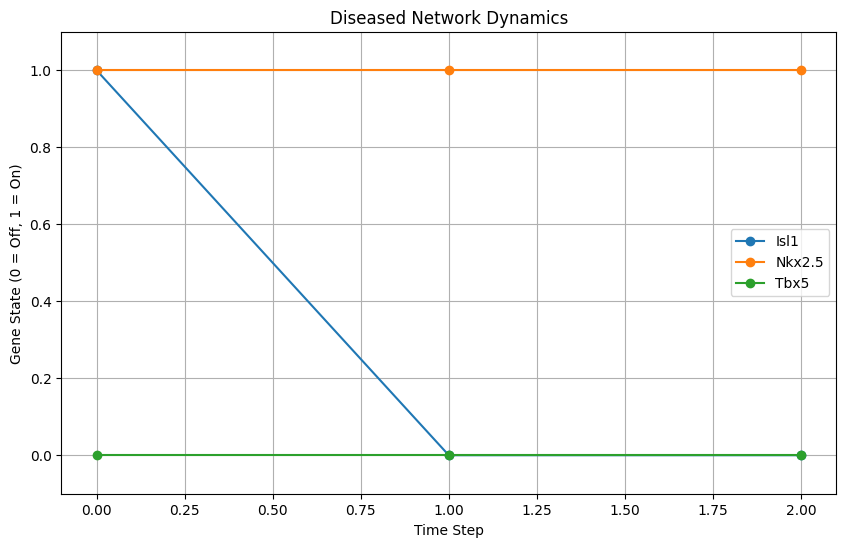

In [11]:
# Plotting function to visualize gene states over time
def plot_gene_states(state_history, title="Network Dynamics"):
    time_steps = range(len(state_history))
    gene_states = {gene: [state[gene] for state in state_history] for gene in genes}

    plt.figure(figsize=(10, 6))
    for gene, states in gene_states.items():
        plt.plot(time_steps, states, label=gene, marker="o")

    plt.xlabel("Time Step")
    plt.ylabel("Gene State (0 = Off, 1 = On)")
    plt.title(title)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run and plot for healthy network
healthy_history = simulate_network(initial_state_healthy, steps=10, disease=False)
plot_gene_states(healthy_history, title="Healthy Network Dynamics")

# Run and plot for diseased network
disease_history = simulate_network(initial_state_disease, steps=10, disease=True)
plot_gene_states(disease_history, title="Diseased Network Dynamics")

## 3. Incorporating Uncertainty: a fuzzy Boolean network

Incorporating uncertainty and fuzziness into a Boolean network as done by Grieb et al. (2015) involves transitioning from strict binary (0/1) states to a range of values between 0 and 1, which represent the "propensity" of each gene's expression. This approach, often called a fuzzy Boolean network, allows for intermediate values, capturing more nuanced gene expression levels and reflecting biological variability.



In [ ]:
'''
Replace standard Boolean operators with fuzzy counterparts:
AND becomes multiplication (A AND B → A * B).
OR becomes a sum minus the product (A OR B → A + B - (A * B)).
NOT becomes 1 - A.


'''

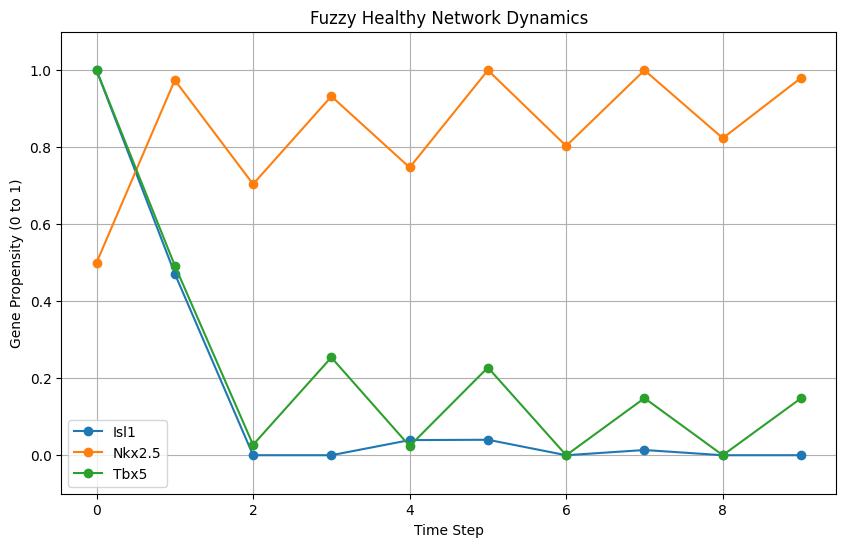

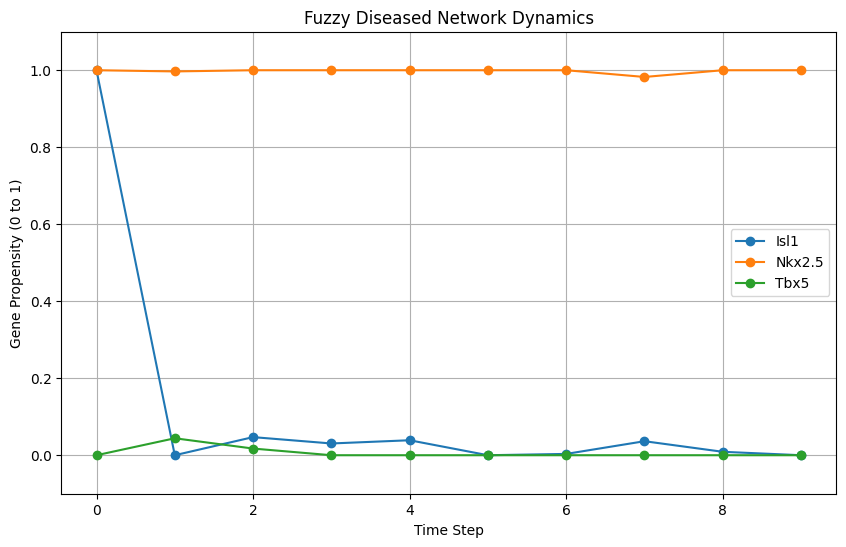

In [12]:
# Define genes and initial fuzzy states (between 0 and 1 for fuzzy logic)
genes = ["Isl1", "Nkx2.5", "Tbx5"]
initial_state_healthy = {"Isl1": 1.0, "Nkx2.5": 0.5, "Tbx5": 1.0}
initial_state_disease = {"Isl1": 1.0, "Nkx2.5": 1.0, "Tbx5": 0.0}  # Diseased conditions with altered states

# Fuzzy logic functions
def fuzzy_and(a, b):
    return a * b

def fuzzy_or(a, b):
    return a + b - (a * b)

def fuzzy_not(a):
    return 1 - a

# Fuzzy update rules for the network in a healthy state
def update_Isl1_healthy(current_state):
    return fuzzy_and(current_state["Isl1"], fuzzy_not(current_state["Nkx2.5"]))

def update_Nkx2_5_healthy(current_state):
    return fuzzy_or(current_state["Isl1"], fuzzy_not(current_state["Tbx5"]))

def update_Tbx5_healthy(current_state):
    return fuzzy_not(current_state["Nkx2.5"])

# Fuzzy update rules for the network in a diseased state
def update_Isl1_disease(current_state):
    return fuzzy_and(current_state["Isl1"], fuzzy_not(current_state["Nkx2.5"]))

def update_Nkx2_5_disease(current_state):
    return 1.0  # Nkx2.5 remains overexpressed in the disease state

def update_Tbx5_disease(current_state):
    return 0.0  # Tbx5 has a loss of function in the disease state

# Update function to introduce small random noise for uncertainty
def add_uncertainty(value, uncertainty=0.05):
    noise = np.random.uniform(-uncertainty, uncertainty)
    return min(1.0, max(0.0, value + noise))  # Ensure values stay in [0, 1]

# Update network function with fuzziness and uncertainty
def update_network(current_state, disease=False):
    if disease:
        next_state = {
            "Isl1": add_uncertainty(update_Isl1_disease(current_state)),
            "Nkx2.5": add_uncertainty(update_Nkx2_5_disease(current_state)),
            "Tbx5": add_uncertainty(update_Tbx5_disease(current_state))
        }
    else:
        next_state = {
            "Isl1": add_uncertainty(update_Isl1_healthy(current_state)),
            "Nkx2.5": add_uncertainty(update_Nkx2_5_healthy(current_state)),
            "Tbx5": add_uncertainty(update_Tbx5_healthy(current_state))
        }
    return next_state

# Simulation function with fuzzy states
def simulate_network(initial_state, steps=10, disease=False):
    state_history = []
    current_state = initial_state

    for step in range(steps):
        state_history.append(current_state)
        next_state = update_network(current_state, disease=disease)

        # Stop if an attractor is reached
        if next_state == current_state:
            state_history.append(next_state)
            break

        current_state = next_state

    return state_history

# Visualization function to plot fuzzy gene states over time
def plot_fuzzy_gene_states(state_history, title="Fuzzy Network Dynamics"):
    time_steps = range(len(state_history))
    gene_states = {gene: [state[gene] for state in state_history] for gene in genes}

    plt.figure(figsize=(10, 6))
    for gene, states in gene_states.items():
        plt.plot(time_steps, states, label=gene, marker="o")

    plt.xlabel("Time Step")
    plt.ylabel("Gene Propensity (0 to 1)")
    plt.title(title)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run and plot for healthy network
healthy_history = simulate_network(initial_state_healthy, steps=10, disease=False)
plot_fuzzy_gene_states(healthy_history, title="Fuzzy Healthy Network Dynamics")

# Run and plot for diseased network
disease_history = simulate_network(initial_state_disease, steps=10, disease=True)
plot_fuzzy_gene_states(disease_history, title="Fuzzy Diseased Network Dynamics")


## 4. Identification and Analysis of Attractors in the Fuzzy Boolean Network

To analyze and list the number of fixed points (states that remain stable once reached) and cycles (states that repeat in a sequence with a defined period), we need to extend the attractor analysis. We will identify fixed points as attractors with a period of 1 and cycles as attractors that recur with a period greater than 1.

Healthy Network Attractors:
Fixed Points: 0
Cycles and their Periods: [((0.0, 0.81, 0.03), 2), ((0.0, 0.91, 0.17), 3), ((0.0, 0.98, 0.25), 10), ((0.0, 0.83, 0.08), 6), ((0.0, 0.66, 0.24), 2), ((0.03, 0.84, 0.11), 20), ((0.0, 0.74, 0.26), 6), ((0.01, 0.82, 0.38), 16), ((0.01, 0.53, 0.5), 2), ((0.01, 1.0, 0.31), 2), ((0.0, 0.98, 0.29), 2), ((0.0, 0.28, 0.16), 10), ((0.01, 0.45, 0.0), 2), ((0.0, 0.7, 0.32), 3), ((0.0, 0.61, 0.0), 2)]

Diseased Network Attractors:
Fixed Points: 7
Cycles and their Periods: [((0.0, 0.96, 0.03), 3), ((0.04, 1.0, 0.0), 4), ((0.0, 0.98, 0.0), 2), ((0.0, 1.0, 0.0), 5), ((0.0, 0.97, 0.0), 4), ((0.0, 0.96, 0.0), 3), ((0.0, 1.0, 0.0), 2), ((0.0, 1.0, 0.0), 3)]


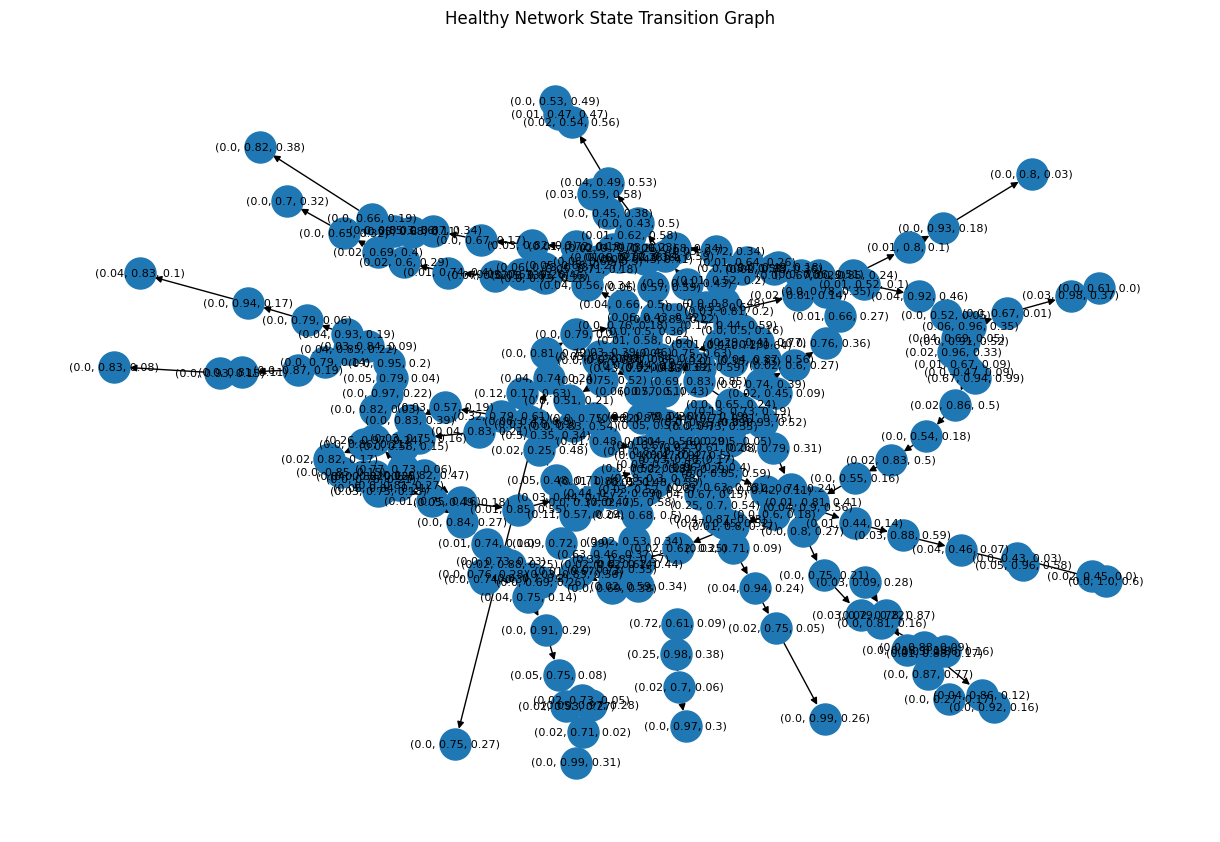

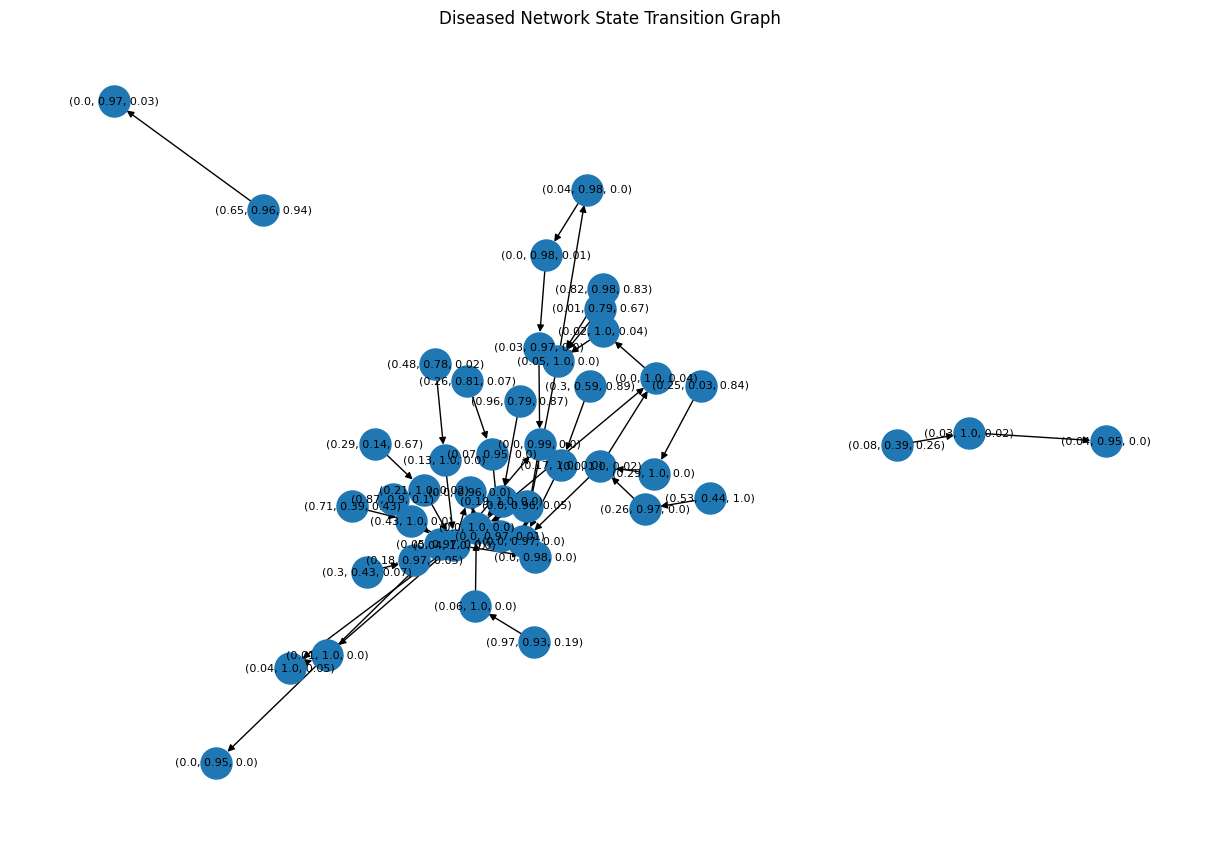

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define fuzzy logic functions
def fuzzy_and(a, b):
    return a * b

def fuzzy_or(a, b):
    return a + b - (a * b)

def fuzzy_not(a):
    return 1 - a

# Fuzzy update rules for the network in healthy and diseased states
def update_Isl1(current_state, disease=False):
    return fuzzy_and(current_state["Isl1"], fuzzy_not(current_state["Nkx2.5"]))

def update_Nkx2_5(current_state, disease=False):
    return 1.0 if disease else fuzzy_or(current_state["Isl1"], fuzzy_not(current_state["Tbx5"]))

def update_Tbx5(current_state, disease=False):
    return 0.0 if disease else fuzzy_not(current_state["Nkx2.5"])

# Add slight random noise to introduce uncertainty
def add_uncertainty(value, uncertainty=0.05):
    noise = np.random.uniform(-uncertainty, uncertainty)
    return min(1.0, max(0.0, value + noise))

# Update network function with fuzziness and uncertainty
def update_network(current_state, disease=False):
    next_state = {
        "Isl1": add_uncertainty(update_Isl1(current_state, disease)),
        "Nkx2.5": add_uncertainty(update_Nkx2_5(current_state, disease)),
        "Tbx5": add_uncertainty(update_Tbx5(current_state, disease))
    }
    return next_state

# Function to check if two states are approximately equal (to handle fuzzy values)
def states_are_equal(state1, state2, tolerance=0.01):
    return all(abs(state1[gene] - state2[gene]) < tolerance for gene in state1)

# Run the simulation and detect fixed points and cycles
def simulate_until_attractor(initial_state, disease=False, max_steps=50, tolerance=0.01):
    current_state = initial_state
    state_history = []

    for step in range(max_steps):
        next_state = update_network(current_state, disease)
        state_history.append(current_state)

        # Check if we’ve seen this state before (detect cycles)
        for i, previous_state in enumerate(state_history[:-1]):
            if states_are_equal(next_state, previous_state, tolerance):
                cycle_period = step - i + 1
                return state_history[:i + 1], next_state, "Cycle", cycle_period

        # Check if the state is stable (detect fixed points)
        if states_are_equal(next_state, current_state, tolerance):
            return state_history, next_state, "Fixed Point", 1

        current_state = next_state

    return state_history, None, "No Attractor", 0  # No attractor found within max steps

# Run simulations from multiple initial states and find fixed points and cycles
def find_fixed_points_and_cycles(num_initial_states=10, disease=False):
    attractors = {"Fixed Points": [], "Cycles": []}
    transition_graph = nx.DiGraph()

    for i in range(num_initial_states):
        initial_state = {gene: np.random.rand() for gene in ["Isl1", "Nkx2.5", "Tbx5"]}
        state_history, attractor, attractor_type, period = simulate_until_attractor(initial_state, disease)

        # Track attractors and periods
        attractor_key = tuple(round(v, 2) for v in attractor.values()) if attractor else None
        if attractor_key:
            if attractor_type == "Fixed Point":
                attractors["Fixed Points"].append(attractor_key)
            elif attractor_type == "Cycle":
                attractors["Cycles"].append((attractor_key, period))

        # Add states and transitions to the graph
        for j in range(len(state_history) - 1):
            transition_graph.add_edge(
                tuple(round(v, 2) for v in state_history[j].values()),
                tuple(round(v, 2) for v in state_history[j + 1].values())
            )

    return attractors, transition_graph

# Plotting function for state transition graph
def plot_state_transition_graph(transition_graph, title="State Transition Graph"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(transition_graph)
    nx.draw(transition_graph, pos, with_labels=True, node_size=500, font_size=8, font_color="black")
    plt.title(title)
    plt.show()

# Run attractor analysis for healthy and diseased conditions
attractors_healthy, transition_graph_healthy = find_fixed_points_and_cycles(num_initial_states=15, disease=False)
attractors_disease, transition_graph_disease = find_fixed_points_and_cycles(num_initial_states=15, disease=True)

# Display attractors and plot transition graphs
print("Healthy Network Attractors:")
print("Fixed Points:", len(attractors_healthy["Fixed Points"]))
print("Cycles and their Periods:", [(cycle, period) for cycle, period in attractors_healthy["Cycles"]])

print("\nDiseased Network Attractors:")
print("Fixed Points:", len(attractors_disease["Fixed Points"]))
print("Cycles and their Periods:", [(cycle, period) for cycle, period in attractors_disease["Cycles"]])

# Plot transition graphs
plot_state_transition_graph(transition_graph_healthy, title="Healthy Network State Transition Graph")
plot_state_transition_graph(transition_graph_disease, title="Diseased Network State Transition Graph")



Reduced Variability Due to Overexpression or Loss of Function


In a disease state, specific genes may become overexpressed (constantly “on”) or suffer loss of function (constantly “off”). This restricts the range of possible states for these genes, effectively simplifying the network's dynamics.
When fewer genes are able to fluctuate, the network becomes less dynamic and more prone to settle into fixed states rather than exploring a diverse set of possible transitions.